In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [132]:
loan_data_processed=pd.read_csv("Data/loan_data_2007_2014_preprocessed.csv")
loan_data_processed.head()

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [133]:
loan_data_defaults= loan_data_processed[loan_data_processed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [134]:
loan_data_defaults.shape

(43236, 209)

In [135]:
pd.options.display.max_rows=None
loan_data_defaults.isnull().sum()


Unnamed: 0                                                             0
Unnamed: 0.1                                                           0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

The Independent variables in LGD and EAD models do not have to be only dummy variables,like in the PD model.

# Independent Variable

 Handling Missing Values

In [136]:
loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)

In [137]:
loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)

Dependent Variables

LGD= 1 - recovery 

Recovery rate= recoveries / funded amount

In [138]:
loan_data_defaults['recovery rate']=loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']

In [139]:
loan_data_defaults['recovery rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery rate, dtype: float64

In [140]:
loan_data_defaults['recovery rate'] = np.where(loan_data_defaults['recovery rate'] > 1, 1, loan_data_defaults['recovery rate'])
loan_data_defaults['recovery rate'] = np.where(loan_data_defaults['recovery rate'] < 0, 0, loan_data_defaults['recovery rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

Recovery rate is the dependent variable for the LGD model and we have successfully preprocessed it.

EAD= total funded amount * credit conversion factor

total recovered principal reflects the total payments made on the principal of the loan

In [141]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp'])/ loan_data_defaults['funded_amnt']


In [142]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [64]:
loan_data_defaults.to_csv("loan_data_defaults.csv")

# Explore Dependent Variable

In [65]:
sns.set()

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

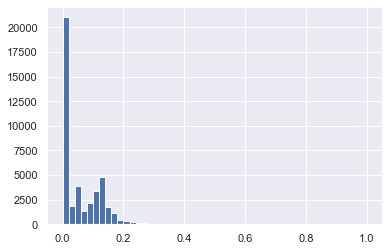

In [66]:
plt.hist(loan_data_defaults['recovery rate'],bins=50)


(array([  20.,   60.,   29.,   97.,   70.,   84.,  150.,   78.,  124.,
         170.,  152.,  208.,  199.,  228.,  242.,  276.,  300.,  335.,
         339.,  376.,  412.,  421.,  505.,  505.,  575.,  583.,  614.,
         735.,  756.,  812.,  840.,  942.,  959., 1137., 1217., 1418.,
        1431., 1580., 1732., 1850., 2003., 2151., 2123., 2376., 2447.,
        2693., 2366., 2115., 1527.,  874.]),
 array([4.3800000e-04, 2.0429240e-02, 4.0420480e-02, 6.0411720e-02,
        8.0402960e-02, 1.0039420e-01, 1.2038544e-01, 1.4037668e-01,
        1.6036792e-01, 1.8035916e-01, 2.0035040e-01, 2.2034164e-01,
        2.4033288e-01, 2.6032412e-01, 2.8031536e-01, 3.0030660e-01,
        3.2029784e-01, 3.4028908e-01, 3.6028032e-01, 3.8027156e-01,
        4.0026280e-01, 4.2025404e-01, 4.4024528e-01, 4.6023652e-01,
        4.8022776e-01, 5.0021900e-01, 5.2021024e-01, 5.4020148e-01,
        5.6019272e-01, 5.8018396e-01, 6.0017520e-01, 6.2016644e-01,
        6.4015768e-01, 6.6014892e-01, 6.8014016e-01, 7.0

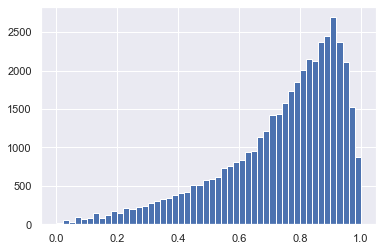

In [67]:
plt.hist(loan_data_defaults['CCF'],bins=50)

In [143]:
loan_data_defaults['recovery rate_0_1']=np.where(loan_data_defaults['recovery rate']==0,0,1)

In [69]:
loan_data_defaults['recovery rate_0_1'].value_counts()

1    24371
0    18865
Name: recovery rate_0_1, dtype: int64

# LGD MOdel

# stage-1 Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train,lgd_inputs_stage_1_test,lgd_targets_stage_1_train,lgd_targets_stage_1_test= train_test_split(loan_data_defaults.drop(['good_bad','recovery rate','recovery rate_0_1','CCF'],axis=1),loan_data_defaults['recovery rate_0_1'],test_size=0.2,random_state=272)


## preparing the inputs

In [71]:
features_all= ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [72]:
features_reference_cat=['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [73]:
lgd_inputs_stage_1_train=lgd_inputs_stage_1_train[features_all]
# Here we keep only the variables we need for the model.

In [74]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [75]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

In [144]:
lr=LogisticRegression()
lr.fit(lgd_inputs_stage_1_train,lgd_targets_stage_1_train)

LogisticRegression()

In [77]:
score,p_value=chi2(lgd_inputs_stage_1_train,lgd_targets_stage_1_train)
summary_table=pd.DataFrame(columns=['Feature Name'],data=lgd_inputs_stage_1_train.columns.values)
summary_table['Coefficients']=np.transpose(lr.coef_)
summary_table['p_value']=p_value
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',lr.intercept_[0],np.nan]
summary_table=summary_table.sort_index()
summary_table

,Feature Name,Coefficients,p_value
0,Intercept,-2.281742e-04,NaN
1,grade:A,-2.639492e-05,6.268045e-01
2,grade:B,-1.300220e-04,1.466513e-02
3,grade:C,-2.450623e-04,1.535138e-07
4,grade:D,1.562876e-05,8.759135e-02
5,grade:E,2.150488e-05,2.255151e-02
6,grade:F,1.240578e-04,4.237568e-15
7,home_ownership:MORTGAGE,-6.905719e-05,3.992030e-01
8,home_ownership:NONE,1.297238e-06,1.823542e-01
9,home_ownership:OTHER,3.418745e-06,1.259699e-02


# Testing Model

In [78]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [79]:
lgd_inputs_stage_1_test= lgd_inputs_stage_1_test.drop(features_reference_cat,axis=1)

In [80]:
y_hat_test_lgd_stage_1= lr.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_1

array([1, 1, 1, ..., 1, 0, 1])

In [81]:
y_hat_test_proba_lgd_stage_1=lr.predict_proba(lgd_inputs_stage_1_test)
y_hat_test_proba_lgd_stage_1=y_hat_test_proba_lgd_stage_1[:][:,1]

In [82]:
lgd_targets_stage_1_test_temp=lgd_targets_stage_1_test

In [83]:
lgd_targets_stage_1_test_temp.reset_index(drop=True,inplace=True)

In [84]:
df_actual_predicted_probs= pd.concat([lgd_targets_stage_1_test_temp,pd.DataFrame(y_hat_test_proba_lgd_stage_1)],axis=1)

In [85]:
df_actual_predicted_probs.columns=['lgd_targets_stage_1_test','y_hat_test_proba_lgd_stage_1']

In [86]:
df_actual_predicted_probs.index=lgd_inputs_stage_1_test.index

In [87]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
184439,1,0.650392
216498,1,0.582713
153461,1,0.618474
332878,1,0.402131
184985,0,0.574566


In [88]:
df_actual_predicted_probs['lgd_targets_stage_1_test'].value_counts()

1    4887
0    3761
Name: lgd_targets_stage_1_test, dtype: int64

# Estimating The Accuracy of the model

Accuracy score is :  0.6159805735430157


Text(0.5, 1.0, 'Confusion matrix')

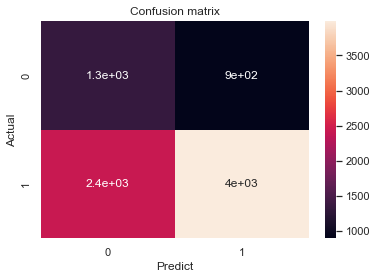

In [90]:
print('Accuracy score is : ',accuracy_score(y_hat_test_lgd_stage_1,lgd_targets_stage_1_test) )
cm=confusion_matrix(y_hat_test_lgd_stage_1,lgd_targets_stage_1_test)
sns.heatmap(cm,annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion matrix')

In [91]:
#ROC curve
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,threshold= roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

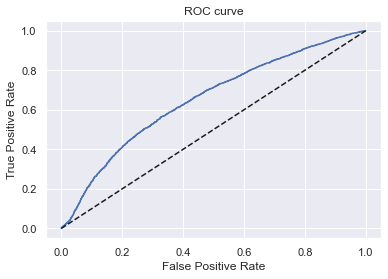

In [93]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [97]:
AUROC= roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC                                                                                                   

0.652453777629138

In [98]:
#DUring the 2nd stage some of the values classified as >1 may be estimated to be =0 thus correcting the current misclassification

# saving the model

In [99]:
import pickle

In [101]:
pickle.dump(lr,open('lgd_model_stage_1.sav','wb'))

# Stage-2 Linear Regression

In [103]:
lgd_stage_2_data= loan_data_defaults[loan_data_defaults['recovery rate_0_1']==1]


In [104]:
lgd_inputs_stage2_train,lgd_inputs_stage2_test,lgd_targets_stage2_train,lgd_targets_stage2_test= train_test_split(lgd_stage_2_data.drop(['good_bad','recovery rate','recovery rate_0_1','CCF'],axis=1),lgd_stage_2_data['recovery rate'],test_size=0.2,random_state=272)

In [106]:
lgd_inputs_stage2_train= lgd_inputs_stage2_train[features_all]
lgd_inputs_stage2_train= lgd_inputs_stage2_train.drop(features_reference_cat,axis=1)

In [107]:
linreg=LinearRegression()


In [109]:
linreg.fit(lgd_inputs_stage2_train,lgd_targets_stage2_train)

LinearRegression()

In [111]:
summar_table=pd.DataFrame(columns=['Feature Name'],data=lgd_inputs_stage2_train.columns.values)
summar_table['Coefficients']= np.transpose(linreg.coef_)
summar_table.index=summar_table.index+1
summar_table.loc[0]=['Intercept',linreg.intercept_]
summar_table.sort_index()
summar_table

,Feature Name,Coefficients
1,grade:A,-8.393249e-02
2,grade:B,-6.625883e-02
3,grade:C,-5.023132e-02
4,grade:D,-3.808045e-02
5,grade:E,-2.045384e-02
6,grade:F,-6.638683e-03
7,home_ownership:MORTGAGE,2.220637e-03
8,home_ownership:NONE,1.318981e-01
9,home_ownership:OTHER,1.485461e-02
10,home_ownership:OWN,3.837685e-03


## Linear Regression Evaluation

In [113]:
lgd_inputs_stage2_test = lgd_inputs_stage2_test[features_all]
lgd_inputs_stage2_test = lgd_inputs_stage2_test.drop(features_reference_cat,axis=1)

In [114]:
y_hat_test_lgd_stage_2=linreg.predict(lgd_inputs_stage2_test)

In [117]:
#to find the correlation between actual and predicted values.
pd.concat([lgd_targets_stage2_test.reset_index(drop=True),pd.DataFrame(y_hat_test_lgd_stage_2)],axis=1).corr()

,recovery rate,0
recovery rate,1.000000,0.290188
0,0.290188,1.000000


<AxesSubplot:xlabel='recovery rate', ylabel='Density'>

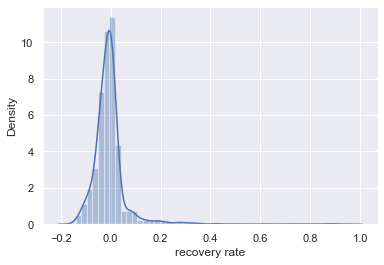

In [122]:
#lets see the distribution of errors or residual which is difference between actual and predicted values
#distribution should be normally distributed
sns.distplot(lgd_targets_stage2_test - y_hat_test_lgd_stage_2)

As this model is symmetrically distributed and follow normal distribution around 0. So we can say that this is a good model.

In [123]:
#save this model in pickle file to use in future
pickle.dump(linreg,open('lgd_model_stage_2.sav','wb'))

# Final Stage--
## combining stage1 and stage 2

In [124]:
# we are predicting all the inputs test for stage 1 as well which has recovery rate==0.
y_hat_test_lgd_stage_2_all= linreg.predict(lgd_inputs_stage_1_test)

In [125]:
y_hat_test_lgd_stage_2_all

array([0.09418451, 0.11796017, 0.1189245 , ..., 0.12377359, 0.15607422,
       0.12489499])

In [126]:
#Wherever there is a 0 predicted by the first model. all values predicted 
#by the second model are multiplied by it will remain 0 and wherever there is
#a 1, all values predicted by the second models are multiplied by 1 so they
# will remain same.
y_hat_test_lgd= y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [127]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.078476
std,0.052139
min,-0.008540
25%,0.000000
50%,0.094598
75%,0.118804
max,0.249515


In [128]:
# if there is any predicted value to be  <0 so we will write as ==0 and >1 
# then we will do as ==1.
y_hat_test_lgd= np.where(y_hat_test_lgd<0 ,0, y_hat_test_lgd )
y_hat_test_lgd= np.where(y_hat_test_lgd>1, 1, y_hat_test_lgd)


In [130]:
#statistics of y_hat_test_lgd
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.078478
std,0.052136
min,0.000000
25%,0.000000
50%,0.094598
75%,0.118804
max,0.249515


In [146]:
# now we can see that min is 0 and max element is 1.